In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [27]:
#Lets create some arbitrary function
def f(x):
    return np.sin(x) + 0.5 * x

In [28]:
#Set our domain at -2pi and 2pi
x = np.linspace(-2 * np.pi, 2* np.pi, 50)

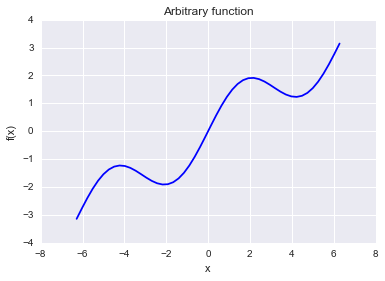

In [29]:
plt.plot(x, f(x), 'b');
plt.title('Arbitrary function');
plt.ylabel('f(x)');
plt.xlabel('x');

In [30]:
#Regression

reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

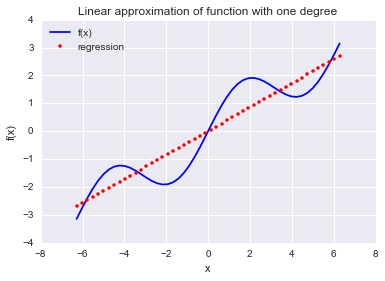

In [31]:
plt.plot(x, f(x), 'b', label='f(x)');
plt.plot(x, ry, 'r.', label='regression');
plt.legend(loc=0)
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear approximation of function with one degree');

In [32]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
print reg#now we have 5 coefficients/parameters

[  1.37920761e-03  -3.57671262e-18  -6.82525072e-02   2.11066509e-17
   1.11425209e+00  -1.45547437e-16]


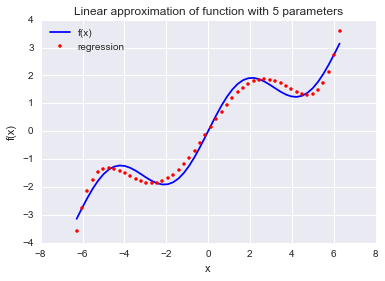

In [33]:
plt.plot(x, f(x), 'b', label='f(x)');
plt.plot(x, ry, 'r.', label='regression');
plt.legend(loc=0)
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear approximation of function with 5 parameters');

In [34]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)
print reg#now we have 7 coefficients/parameters

[ -5.47508597e-05   1.57301859e-19   4.99394999e-03  -2.68987729e-17
  -1.35368487e-01   2.76928032e-16   1.41870278e+00  -4.57262577e-16]


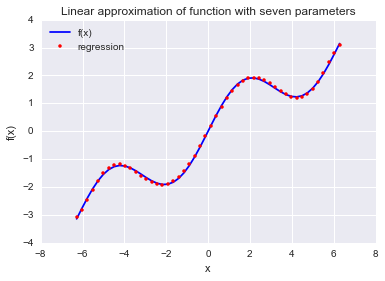

In [35]:

plt.plot(x, f(x), 'b', label='f(x)');
plt.plot(x, ry, 'r.', label='regression');
plt.legend(loc=0)
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear approximation of function with seven parameters');

In [36]:
#Close but not that close
np.allclose(f(x), ry)

False

In [37]:
#What is MSE?
np.sum((f(x)- ry)**2)/len(x)

0.0017769134759517704

In [38]:
matrix = np.zeros((4, len(x)))
matrix[3, :] = x**3
matrix[2, :] = x**2
matrix[1, :] = x
matrix[0, :] = 1


In [39]:
regression = np.linalg.lstsq(matrix.T, f(x))[0]
regression

array([  1.52685368e-14,   5.62777448e-01,  -1.11022302e-15,
        -5.43553615e-03])

In [40]:
ry = np.dot(regression,matrix)
ry

array([-2.18774909, -2.20187043, -2.20306461, -2.19188173, -2.16887188,
       -2.13458516, -2.08957165, -2.03438145, -1.96956464, -1.89567132,
       -1.81325159, -1.72285552, -1.62503322, -1.52033478, -1.40931028,
       -1.29250982, -1.17048349, -1.04378138, -0.91295358, -0.77855019,
       -0.6411213 , -0.50121699, -0.35938737, -0.21618251, -0.07215252,
        0.07215252,  0.21618251,  0.35938737,  0.50121699,  0.6411213 ,
        0.77855019,  0.91295358,  1.04378138,  1.17048349,  1.29250982,
        1.40931028,  1.52033478,  1.62503322,  1.72285552,  1.81325159,
        1.89567132,  1.96956464,  2.03438145,  2.08957165,  2.13458516,
        2.16887188,  2.19188173,  2.20306461,  2.20187043,  2.18774909])

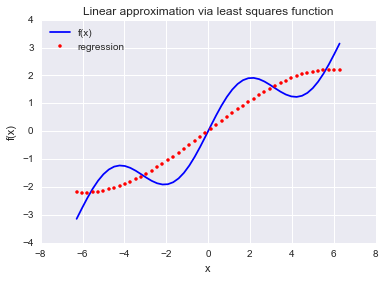

In [41]:
plt.plot(x, f(x), 'b', label='f(x)');
plt.plot(x, ry, 'r.', label='regression');
plt.legend(loc=0);
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear approximation via least squares function');
#Similar to evaluating with 3 params;

In [42]:
#Lets look at Noisy Data

xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))#add noise to our xs
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))#and add noise to our ys

In [43]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

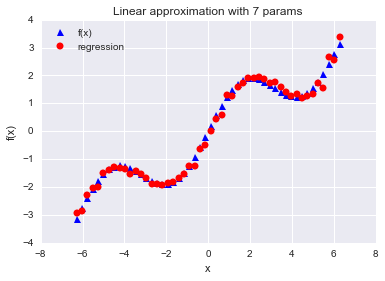

In [44]:
plt.plot(x, f(x), 'b^', label='f(x)');
plt.plot(x, ry, 'ro', label='regression');
plt.legend(loc=0);
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear approximation with 7 params');


In [45]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [46]:
print xu[:10].round(2)
print yu[:10].round(2)

[ 4.07  2.73 -2.58 -1.9   3.38 -1.49  2.17 -3.93  3.24 -3.77]
[ 1.23  1.77 -1.82 -1.9   1.45 -1.74  1.91 -1.26  1.52 -1.3 ]


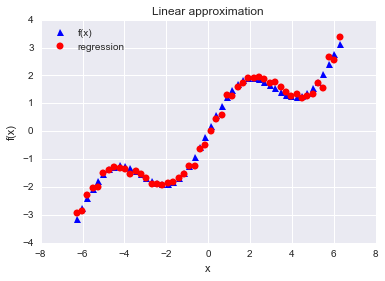

In [47]:
plt.plot(x, f(x), 'b^', label='f(x)');
plt.plot(x, ry, 'ro', label='regression');
plt.legend(loc=0);
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear approximation');

In [48]:
#What about multidimensional data


#Lets create a function with three dimensions
def fm((x, y)):
    return np.sin(x) + .25 * x + np.sqrt(y) + 0.05 * y ** 2

In [49]:
x= np.linspace(0,10, 20)
y = np.linspace(0,10,20)

#Generate 2-d grid from 1-d arrays
X, Y = np.meshgrid(x,y)

Z = fm((X,Y))

#Generate 1-d arrays from 2-d grids
x = X.flatten()
y = Y.flatten()

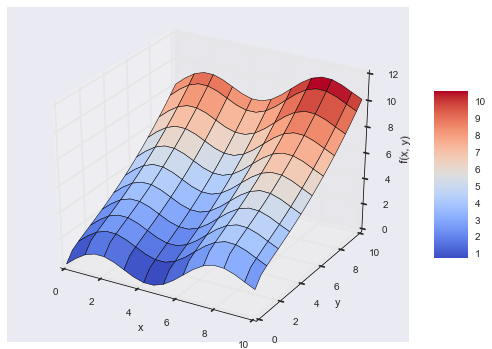

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, lw=.5, antialiased=True)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [51]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [52]:
import statsmodels.api as sm


In [53]:
model = sm.OLS(fm((x,y)), matrix).fit()
a = model.params

In [54]:
def regression_function(a, (x,y)):
    f6 = a[6]*np.sqrt(y)
    f5 = a[5]*np.sin(x)
    f4 = a[4]*y**2
    f3 = a[3]*x**2
    f2 = a[2]*y
    f1 = a[1]*x
    f0 = a[0]*1 
    return (f6 + f5+ f4 + f3 + f2 + f1 + f0)

In [55]:
RZ = regression_function(a , (X,Y) )

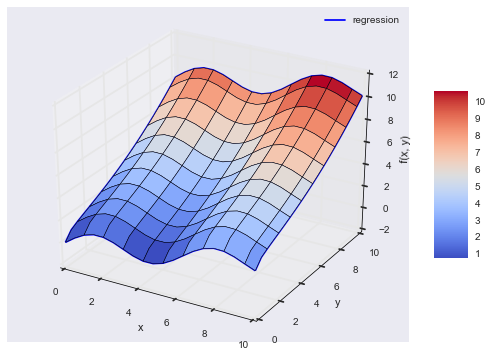

In [61]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf1, shrink=0.5, aspect=5);

In [57]:
#Interpolation

import scipy.interpolate as spi

x = np.linspace(-2*np.pi, 2*np.pi, 25)

In [58]:
def f(x):
    return np.sin(x) + 0.5 * x

In [59]:
ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

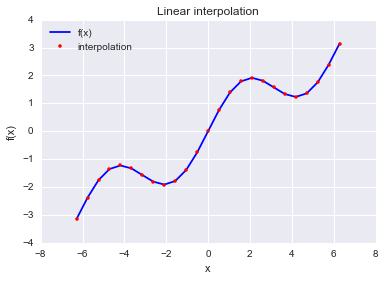

In [63]:
plt.plot(x, f(x), 'b', label='f(x)');
plt.plot(x, iy, 'r.', label='interpolation');
plt.legend(loc=0);
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear interpolation');

In [64]:
np.allclose(f(x), iy)

True

In [66]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd,ipo)

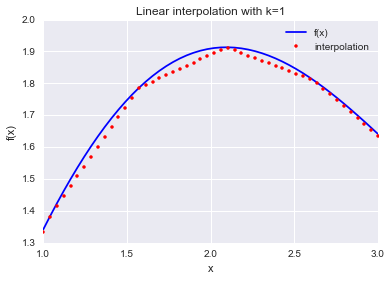

In [72]:
plt.plot(xd, f(xd), 'b', label='f(x)');
plt.plot(xd, iyd, 'r.', label='interpolation');
plt.legend(loc=0);
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Linear interpolation with k=1');

In [73]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

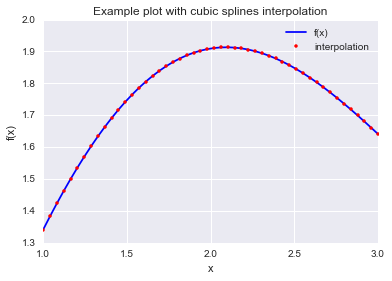

In [78]:
plt.plot(xd, f(xd), 'b', label='f(x)');
plt.plot(xd, iyd, 'r.', label='interpolation');
plt.legend(loc=0);
plt.ylabel('f(x)');
plt.xlabel('x');
plt.title('Example plot with cubic splines interpolation');


In [79]:
np.allclose(f(xd), xd)

False

In [81]:
#Our error is greater than our margin for np.allclose
np.sum((f(xd) - iyd)**2) / len(xd)

1.1349319851436892e-08

In [82]:
#Convex Optimization 

def fm((x,y)):
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

In [83]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X,Y = np.meshgrid(x,y)
Z = fm((X,Y))

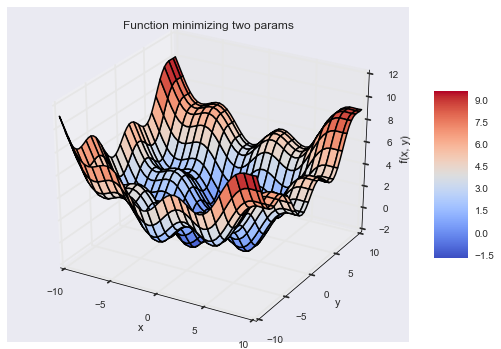

In [89]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, lw=1.5, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Function minimizing two params');

In [90]:
import scipy.optimize as spo

In [91]:
def fo((x,y)):
    
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print '%8.4f %8.4f %8.4f' % (x,y,z)
    return z

In [99]:
#Uses the “brute force” method to compute the function’s value at 
#each point of a multidimensional grid of points, to find the global minimum of the function.
output=True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [100]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [97]:
fm(opt1)

-1.7748994599769203

In [101]:
#Local Optimization
output=True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [103]:
fm(opt2)

-1.7757246992239009

In [104]:
output=False
spo.fmin(fo, (2.0,2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

In [105]:
from math import sqrt
def Eu((s,b)):
    return -(0.5 * sqrt(s* 15 + b * 5) + 0.5 * sqrt(s * 5 + b *12))

# constraints
cons = ({'type': 'ineq', 'fun': lambda (s, b):  100 - s * 10 - b * 10})
  # budget constraint
bnds = ((0, 1000), (0, 1000)) 

In [107]:
result = spo.minimize(Eu, [5,5], method ='SLSQP', bounds=bnds, constraints=cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [109]:
#Integration

import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5 * x

In [110]:
a = 0.5
b = 9.5

x = np.linspace(0,10)
y = f(x)

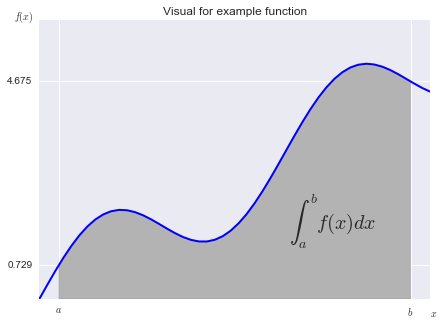

In [112]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])
plt.title('Visual for example function')

In [114]:
#Lets look at a number of ways of estimating grey area under the curve between interval a and b
sci.fixed_quad(f,a,b)

(24.366995967084602, None)

In [116]:
sci.quad(f, a, b)[0]

24.374754718086752

In [117]:
sci.romberg(f,a,b)

24.374754718086713

In [119]:
xi = np.linspace(0.5, 9.5, 25)
sci.trapz(f(xi), xi)

24.352733271544516

In [120]:
sci.simps(f(xi), xi)

24.374964184550748

In [121]:
#Integration by Simulation
#Definition of derivative
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i*10) * (b - a) + a 
    print np.sum(f(x)) / len(x) * (b-a)

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985
